# 15.077: Problem Set 2

Alex Berke (aberke)


## Reading: 
Rice, 4.4.2, 4.6 (pages 161-163), 8.2, 9.1-9.6, 9.10, 10.2.2, 10.4.2-10.4.5, 10.5, 14.1- 14.8 


In [1]:
%config Completer.use_jedi = False # autocomplete

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Problems


### 1. 8.66 
		 	 	 		
Let the unknown probability that a basketball player makes a shot successfully be θ . Suppose your prior on θ is uniform on $[0, 1]$ and that she then makes two shots in a row. Assume that the outcomes of the two shots are independent.

					
#### a. What is the posterior density of θ?

Let’s assume that the probability that the basketball  player makes a shot successfully follows a  binomial distribution.

X=2, n=2.

Because the prior is flat, we might use MLE to estimate the posterior density but this  will not work analytically since there are no failures. i.e. n-X = 0.

The posterior density distribution of the binomial distribution with  a uniform prior is the beta distribution. The posterior mean estimator is then 

$\hat{θ} = \frac{X+1}{n+2} = \frac{3}{4}$


#### b. What would you estimate the probability that she makes a third shot to be?

$\frac{3}{4}$

### 2. 9.24
Let X be a binomial random variable with n trials and probability p of success.


#### A. What is the generalized likelihood ratio for testing H0: p = .5 versus HA: p ≠ .5?


For HA, the value of p that maximizes the likelihood is p = X/n.  Therefore the generalized likelihood ratio is 

Λ = $ \frac{max_{p∈{0.5}}P(X|H_0)}{max_{p∈<0,1>}P(X|H_A)} = \frac{P(X = x | p = 0.5)}{P(X = x | p = \frac{X}{n})}$

The numerator is equivalent to:
$ \binom{n}{X} (0.5)^X \times (0.5)^{n-X} = \binom{n}{X} 0.5^n$

The denominator is equivalent to:
$ \binom{n}{X} (\frac{X}{n})^X \times (1 - \frac{X}{n})^{n-X}
= \binom{n}{X} (\frac{X}{n})^X \times (\frac{n}{n} - \frac{X}{n})^{n-X} 
= \binom{n}{X} (\frac{X}{n})^X \times (\frac{n - X}{n})^{n-X} 
= \binom{n}{X} \frac{X^X (n - X)^{n-X}}{n^n} $


With the numerator over the denominator, the binomial expressions cancel out and we have 

Λ = $\frac{0.5^n n^n}{X^X (n-X)^{n-X}} $

#### B. Show that the test rejects for large values of |X − n/2|.

This is intuitive, since if |X- n/2| is small, then it means that X is close to n/2, i.e. p ~ 0.5 which would be the null hypothesis H0.
Thus |X - n/2| must be large.

We can also show this analytically with the likelihood ratio.

As shown in (A), 

Λ = $\frac{(\frac{n}{2})^n}{X^X (n-X)^{n-X}} $

The numerator is fixed in n. Changes in X effect the denominator, D.

In the case $X = \frac{n}{2}$ then the denominator, D, is equivalent to the numerator, $(\frac{n}{2})^2 $ and so Λ = 1, since then 

$ D =  (\frac{n}{2})^X(n - \frac{n}{2})^{n-X} =  (\frac{n}{2})^X(\frac{n}{2})^{n-X} =  (\frac{n}{2})^{n} $

If X is much less than $\frac{n}{2}$ then X is relatively small compared  to (n  - X) so the first term in the denominator is small and so is its exponent (X), and the second term is relatively large and so is it's exponent (n - X), so the denominator is more than $(\frac{n}{2})^{n} $.

On the other hand, If X is much more than $\frac{n}{2}$ then X is relatively large compared  to (n  - X) so the first term in the denominator is large and so is its exponent (X), and the second term is relatively small and so is it's exponent (n - X), so the denominator is more than $(\frac{n}{2})^{n} $.

In either  case, |X- n/2| is large and the denominator is large compared to the numerator and so the test rejects.

#### C. Using the null distribution of X, show how the significance level corresponding to a rejection region |X − n/2| > k can be determined.

For a given significance  level, α,

$ P(X <  \frac{n}{2} - k) + P(X > \frac{n}{2} + k) = α$.

Since the null distribution is symmettric around $\frac{n}{2}$ this is the same as finding

$ P(X > \frac{n}{2} + k) = \frac{α}{2}$

This value is found with the binomial distribution summed over values $\frac{n}{2} + k +1$ to n:

$ \sum_{\frac{n}{2} + k +1}^{n} \binom{n}{X} (0.5)^X(0.5)^{n-X}$


#### D.  If n = 10 and k = 2, what is the significance level of the test?

In [152]:
from scipy.stats import binom, norm

n = 10
k = 2

s = 0
for x in range(int(n/2)+k+1, n+1):
    s += binom.pmf(x, n, 0.5)
print('significance level of the test: 2 x %s = %s' % (s, 2*s))

significance level of the test: 2 x 0.0546875 = 0.109375


#### E.  Use the normal approximation to the binomial distribution to find the significance level if  n = 100 and k = 10.

mean, μ = n * p = 100 x 0.5 = 50

standard deviation, σ = √(n x p x (1-p)) = √(100 x 0.5 x 0.5) = 5


P(X > 100/2 + 10) = P(X >  60) = α/2

In [153]:
mean, std = 50, 5
print('α: ', 2 * norm(mean, std).sf(60))


α:  0.04550026389635839


This analysis is the basis of the sign test, a typical application of which would be something like this: An experimental drug is to be evaluated on laboratory rats. In n pairs of litter mates, one animal is given the drug and the other is given a placebo. A physiological measure of benefit is made after some time has passed. Let X be the number of pairs for which the animal receiving the drug benefited more than its litter mate. A simple model for the distribution of X if there is no drug effect is binomial with p = .5. This is then the null hypothesis that must be made untenable by the data before one could conclude that the drug had an effect. 


### 3. 9.38  

Yip et  al. (2000) studied seasonal variations in suiciderates in England and Wales during 1982–1996, collecting counts shown in the following table.

In [132]:
suicides = pd.DataFrame({
    'Month': [
        'Jan',
        'Feb',
        'Mar',
        'Apr',
        'May',
        'Jun',
        'July',
        'Aug',
        'Sept',
        'Oct',
        'Nov',
        'Dec',
    ],
    'Males': [
        3755,
        3251,
        3777,
        3706,
        3717,
        3660,
        3669,
        3626,
        3481,
        3590,
        3605,
        3392,
    ],
    'Females': [
        1362,
        1244,
        1496,
        1452,
        1448,
        1376,
        1370,
        1301,
        1337,
        1351,
        1416,
        1226,
    ]})
suicides

,Month,Males,Females
0,Jan,3755,1362
1,Feb,3251,1244
2,Mar,3777,1496
3,Apr,3706,1452
4,May,3717,1448
5,Jun,3660,1376
6,July,3669,1370
7,Aug,3626,1301
8,Sept,3481,1337
9,Oct,3590,1351


### Do either the male or female data show seasonality?

We specify  the null hypothesis, H0, as no seasonality, and the alternative hypothesis, HA, is that there is seasonality.

Under the null hypothesis, the proportion of total suicides in  each of  the 12 months is the  same. We reject the null hypothesis for the alternative if this is not the  case.

i.e.

Let $p_i$ denote  the probability  for month $i$ where month 1 is January, month 2 is February...

$ H_0 : p_1 = p_2, ...,  p_{12} = \frac{1}{12} $

$H_A : p_i \neq \frac{1}{12}$  for some $i $

We test H0 for male and female values separately with Pearson $X^2$ statistics.

$ X^2 = \sum \frac{(O_i - E_i)^2}{E_i}  $ with 12-1 = 11 degrees  of freedom where $O_i, E_i$ are the observed and expected counts for each month $i$.  $E_i = \frac{total}{12}$

In [142]:
males_total = suicides['Males'].sum()
females_total  = suicides['Females'].sum()
print('Males total: %s\nFemales total: %s' % (males_total, females_total))

# add expected values
suicides['Males expected'] = round((1/12)*males_total)
suicides['Females expected'] = round((1/12)*females_total)

# Calculate the  statistic for males:
males_chi_sq = (
    ((suicides['Males'] - suicides['Males expected'])**2)/suicides['Males expected']
).sum()
print('Pearsons chi-squared statistic from the males suicide data: %s' % males_chi_sq)

# Calculate the  statistic for males:
females_chi_sq = (
    ((suicides['Females'] - suicides['Females expected'])**2)/suicides['Females expected']
).sum()
print('Pearsons chi-squared statistic from the females suicide data: %s' % females_chi_sq)

suicides

Males total: 43229
Females total: 16379
Pearsons chi-squared statistic from the males suicide data: 74.5694058856191
Pearsons chi-squared statistic from the females suicide data: 53.782417582417565


,Month,Males,Females,Males expected,Females expected
0,Jan,3755,1362,3602,1365
1,Feb,3251,1244,3602,1365
2,Mar,3777,1496,3602,1365
3,Apr,3706,1452,3602,1365
4,May,3717,1448,3602,1365
5,Jun,3660,1376,3602,1365
6,July,3669,1370,3602,1365
7,Aug,3626,1301,3602,1365
8,Sept,3481,1337,3602,1365
9,Oct,3590,1351,3602,1365


By referring to a $X^2$ table with df=11, we can see that for both males and females, the p-value of this test is less than 0.005.

We can therefore reject the null hypothesis in favor of the alternative hypothesis.

i.e. Both the males and females data shows seasonality.

For both males and females, there were more suicides in Mar, Apr, and May. For males  there was also a spike in Jan, and for females a spike in Nov.

### 4. 9.47 
Let X follow a Poisson distribution with mean λ. 
Show that the transformation

Y =  √X  

is variance-stabilizing.

From Rice Section 9.7:	

> Suppose that a random variable X has mean μ and variance σ^2(μ), which depends on μ. If Y = f(X), the method of propagation of error (Section 4.6) shows that

> $ Var(Y) ≈ σ^2 (μ) [ f'(μ) ]^2$

> Thus if f is chosen so that $σ^2(μ)[ f′(μ)]^2$ is constant, the variance of Y will not depend on μ. The transformation f that accomplishes this is called a variance-stabilizing transformation. 

Since  X is Poisson distributed, $μ = λ$ and $σ^2(μ) = λ$.

So $Var(Y) =  λ[f ’(λ)]^2$

Now let $Y =  f(X) = √X$

Then $f'(X) = ½ (X)^{\frac{-1}{2}}$

$Var(Y) =  λ[\frac{1}{2}(λ)^{\frac{-1}{2}}]^2  = λ(\frac{1}{4})(λ)^{-1} = \frac{1}{4} $

i.e. Var(Y) is constant


### 5. 9.61
The files haliburton and macdonalds give the monthly returns on the stocks of these two companies from 1975 through 1999.

In [92]:
from scipy.stats import norm

haliburton = pd.read_csv('haliburton.txt', header=None, names=['haliburton'])
macdonalds = pd.read_csv('macdonalds.txt', header=None, names=['macdonalds'])

print(haliburton.head(3))
print(macdonalds.head(3))

   haliburton
0    -0.07566
1     0.02564
2     0.12177
   macdonalds
0     0.16596
1     0.18978
2     0.07055


#### a. Make histograms  of the returns and  superimpose fitted normal densities. Comment on the quality of the fit. Which stock is more volatile?

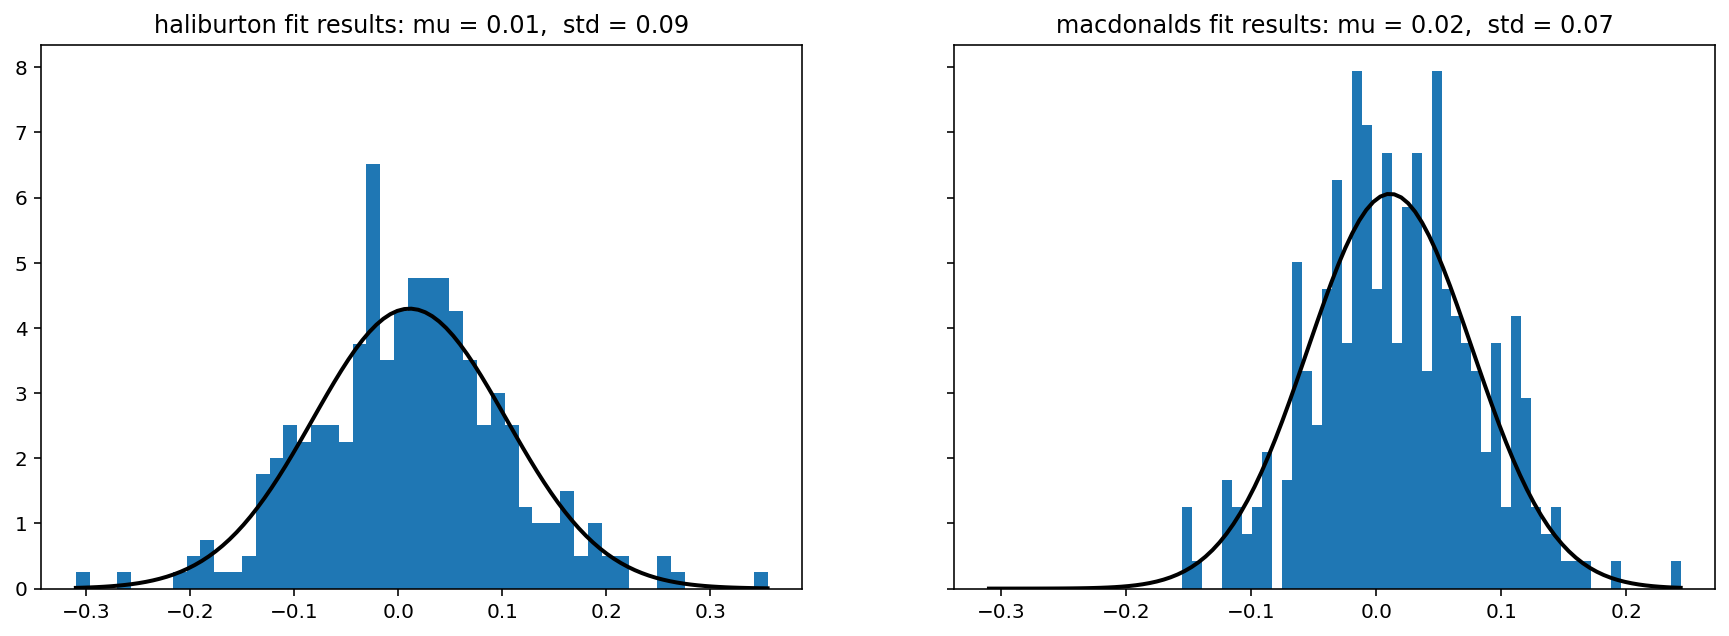

In [124]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

haliburton_mu, haliburton_std = norm.fit(haliburton)
haliburton_x = np.linspace(haliburton.min(), haliburton.max(), 100)
haliburton_p = norm.pdf(haliburton_x, haliburton_mu, haliburton_std)

ax0.hist(haliburton, density=True, bins=50)
ax0.plot(haliburton_x, haliburton_p, 'k', linewidth=2)
ax0.set_title("haliburton fit results: mu = %.2f,  std = %.2f" % (haliburton_mu, haliburton_std))

macdonalds_mu, macdonalds_std = norm.fit(macdonalds)
macdonalds_x = np.linspace(haliburton.min(), macdonalds.max(), 100)
macdonalds_p = norm.pdf(macdonalds_x, haliburton_mu, macdonalds_std)

ax1.hist(macdonalds, density=True, bins=50)
ax1.plot(macdonalds_x, macdonalds_p, 'k', linewidth=2)
_ = ax1.set_title("macdonalds fit results: mu = %.2f,  std = %.2f" % (macdonalds_mu, macdonalds_std))

The Macdonalds data appears more volatile however Haliburton has a  slightly larger standard error value.

#### b. Make normal probability plots and again comment on the quality of the fit. 

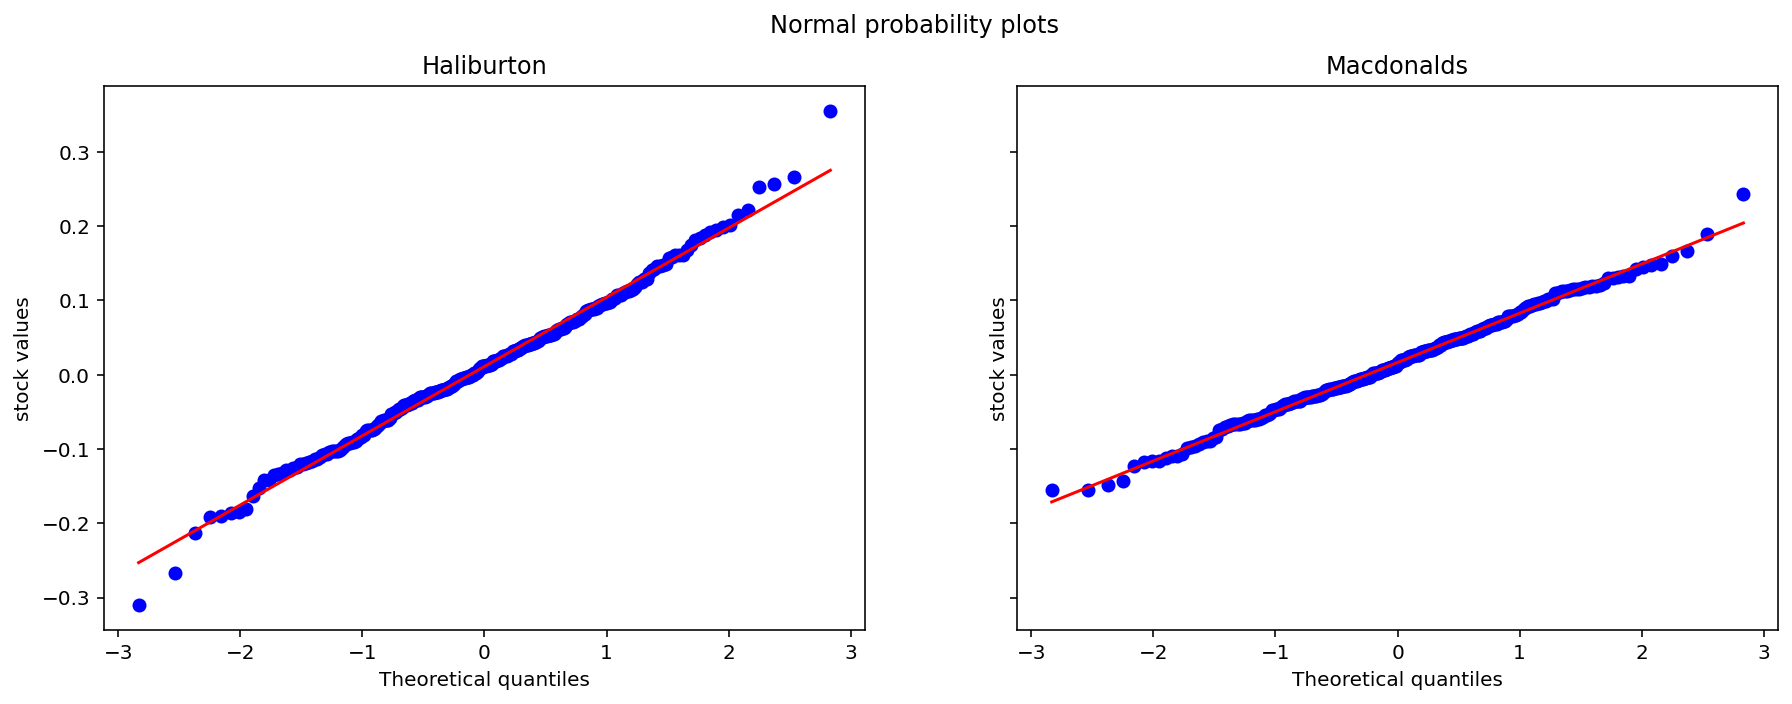

In [131]:
from scipy import stats

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle('Normal probability plots')
stats.probplot(haliburton['haliburton'].values, plot=ax0)
stats.probplot(macdonalds['macdonalds'].values, plot=ax1)
ax0.set_title('Haliburton')
ax1.set_title('Macdonalds')
_ = ax0.set_ylabel('stock values')
_ = ax1.set_ylabel('stock values')

Both stocks are relatively well fit  to the normal distribution however both deviate  at the tails.

Macdonalds shows a slightly better fit.

### 6. 14.7 

(Weighted Least Squares) Suppose that in the model yi = β0 + β1 xi + ei , the errors have mean zero and are independent, but Var(ei) = $ρi^2σ^2$, where the ρi are known constants, so the errors do not have equal variance. This situation arises when the yi are averages of several observations at xi; in this case, if yi is an average of ni independent observations, $ρi^2$ = 1/ni (why?). Because the variances are not equal, the theory developed in this chapter does not apply; intuitively, it seems that the observations with large variability should influence the estimates of β0 and β1 less than the observations with small variability. 

The problem may be transformed as follows:
					
(1/ρi) yi = (1/ρi) β0 + (1/ρi) β1 xi + (1/ρi) ei

Or 
				
zi =ui β0 + vi β1 + δi 

Where 

- ui = 1/pi
- vi = (1/pi) x 
- δi =(1/pi) ei 

#### A. Show that the new model satisfies the assumptions of the standard statistical model.

To  satisfy the assumptions of the standard statistical model, we must have:

1. $E(δ_i) = 0$
2. $Var(δ_i)$ is a constant

The $ρ_i$ can be considered constants with respect to $e_i$, and can therefore be factored  out of the expected value summations.

(1) E(δi) is  clearly  satisfied since the  original model satisfies E(ei) = 0 a d scaling the ei by (1/ρi) does not  change this.

E(δi) = E((1/ρi)ei) = (1/ρi)E(ei) = 0


To show that (2) is satisfied then we  can show:

$ Var(δ_i) = E[δ_i^2] - E[δ_i]^2 = E[((1/ρ_i)e_i)^2] - 0  = E[(1/ρ_i)^2 e_i^2] = (1/ρ_i)^2E[e_i^2]$

Since

$ρ_i^2σ^2 = Var(e_i) = E[e_i^2] - E[e_i]^2 = E[e_i^2] - 0 =  E[e_i^2]$

Then 

$ Var(δ_i) = (1/ρ_i)^2E[e_i^2] = (1/ρ_i)^2ρ_i^2σ^2 = σ^2$

####  B. Find the least squares estimates of β0 and β1.

We find β0, β1 to minimize the function

$ S(u_i β0, β1) = \sum (z_i - u_i β0 - β1 v_i)^2 $

and do so by taking the derivatives w.r.t. β0, β1 and setting them to  zero and solving.

$ ∂S/∂β0 = -2\sum u_i (z_i - u_iβ0 - β1x_i)$

$ ∂S/∂β1 = -2\sum x_i (z_i - u_iβ0 - β1x_i)$

Setting to zero we find  the minimizers   $\hatβ0, \hatβ1$:

$ \sum u_i z_i =  \hatβ0\sum u_i^2 + \hatβ \sum u_i x_i$

$ \sum x_i z_i = \hatβ0  \sum x_i u_i + \hatβ1 \sum  x_i^2$

$\hatβ1  = \frac{\sum  x_i z_i - \hatβ0\sum x_i u_i}{\sum x_i^2} $ 

Which can be substituted into the previous equation to get...

$ \sum u_i z_i = \hatβ0 \sum u_i^2 + \frac{1}{\sum x_i^2}(\sum x_i z_i -  \hatβ0\sum xi_i u_i)(\sum x_i u_i) $

$ \sum x_i^2 \sum u_i z_i  = \sum x_i^2 \hatβ0 \sum u_i^2 + \sum x_i z_i -  \hatβ0(\sum xi_i u_i)^2$

Collecting the $\hatβ0$ terms   to one side and dividing yields

$\hatβ0[(\sum xi_i u_i)^2 - \sum x_i^2 \sum u_i^2] = \sum x_i z_i - \sum x_i^2 \sum u_i z_i $


$\hatβ0 = \frac{\sum x_i z_i - \sum x_i^2 \sum u_i z_i}{(\sum xi_i u_i)^2 - \sum x_i^2 \sum u_i^2} $

I  will save you the arithmatic, but similarly we can show:

$ \hatβ1 = \frac{\sum u_i z_i \sum x_i u_i - \sum x_i z_i \sum(u_i^2)}{(\sum x_i u_i)^2 - \sum(x_i^2)} $

#### C. Show that performing a least squares analysis on the new model, as was done in part (b), is equivalent to minimizing 

$ \sum ( y_i − β0 − β1x_i )^2p_i^{-2} $

To minimize this  model is to  minimize the sum of  the risiduals.

For  the new model this  is

$ \sum (z_i - \hat z_i)^2 = \sum δ_i^2 = \sum (p_i^{-1}e_i)^2  = \sum e_i^2p_i^{-2} $ 

Since  $ δ_i = p_i^{-1}e_i$

Also, $e_i = y_i - \hat y_i$ so  this is also equivalent to 

$ \sum ( y_i − \hat y_i)^2p_i^{-2} = \sum ( yi − β0 − β1x_i )^2p_i^{-2} $

#### D. Find the variances of the estimates of part (B). 


Theorem B  from Rice Section 14.4.2 gives us:

> Under the assumption that the errors have mean zero and are uncorrelated with constant variance $σ^2$, the covariance matrix of the least squares estimate $\hatβ$ is $ \sum_{\hatβ \hatβ} = σ^2(X^T X)^{−1} $

We showed these assumptions hold in part (A) above.

And we can find the covariance matrix $ \sum_{\hatβ \hatβ} = σ^2(X^T X)^{−1} $.

In our case, X is replaced with variables from our model. So we have 
$ X = \begin{bmatrix}
u_1 & v_1 \\
u_2 & v_2 \\
... & ... \\
\end{bmatrix}$ and so, 

$ \sum_{\hatβ \hatβ} = σ^2(X^T X)^{−1} = σ^2(\begin{bmatrix}
u_1 & u_2 & ... \\
v_1 & v_2 & ... \\
\end{bmatrix}\begin{bmatrix}
u_1 & v_1 \\
u_2 & v_2 \\
... & ... \\
\end{bmatrix})^{−1} = σ^2(\begin{bmatrix}
\sum u_i^2 & \sum u_i v_i \\
\sum u_i v_i & \sum v_i^2 \\
\end{bmatrix})^{−1}  = σ^2(\frac{1}{\sum u_i^2 \sum v_i^2 - (\sum u_i v_i)^2})\begin{bmatrix}
\sum v_i^2 & -\sum u_i v_i \\
- \sum u_i v_i & \sum u_i^2 \\
\end{bmatrix}$


The variance  terms are the terms on the diagonals.

$Var(\hat β0) = \frac{σ^2 \sum v_i^2}{\sum u_i^2 \sum v_i^2 - (\sum u_i v_i)^2}, Var(\hat β1) = \frac{σ^2 \sum u_i^2}{\sum u_i^2 \sum v_i^2 - (\sum u_i v_i)^2}$

### 7.  14.55

When gasoline is pumped into the tank of an automobile, hydrocarbon vapors
in the tank are forced out and into the atmosphere, producing a significant amount
of air pollution. For this reason, vapor-recovery devices are often installed on gaso-
line pumps. It is difficult to test a recovery device in actual operation, because all
that can be measured is the amount of vapor actually recovered and, by means of a
”sniffer,” whether any vapor escaped into the atmosphere. To estimate the efficiency
of the device, it is thus necessary to estimate the total amount of vapor in the tank
by using its relation to the values of variables that can actually be measured. In this
exercise, you will try to develop such a predictive relationship using data that were
obtained in a laboratory experiment. The file gasvapor contains recordings of the fol-
lowing variables: 

- initial tank temperature (F◦)
- temperature of the dispensed gasoline (F◦)
- initial vapor pressure in the tank (psi)
- vapor pressure of the dispensed gasoline (psi)
- emitted hydrocarbons (g)

A prediction of emitted hydrocarbons is desired.



In [21]:
gasvapor_train = pd.read_csv('gasvapor_train.txt')
gasvapor_test = pd.read_csv('gasvapor_test.txt')
gasvapor_train.columns = [c.replace("'","") for c in gasvapor_train.columns]
gasvapor_test.columns = [c.replace("'","") for c in gasvapor_test.columns]

gasvapor_train.head(3)

,TankTemp,GasTemp,TankVapor,GasVapor,Hydrocarbons
0,28,33,3.00,3.49,22
1,33,53,3.32,3.42,29
2,33,44,3.28,3.58,27


#### a. Look at the relationships among the variables by scatterplots. 
Comment on which relationships look strong. Based on this information, what variables would you conjecture will be important in the model? Do the plots suggest that transformations will be helpful? Do there appear to be any outliers?


Relationships to TankTemp


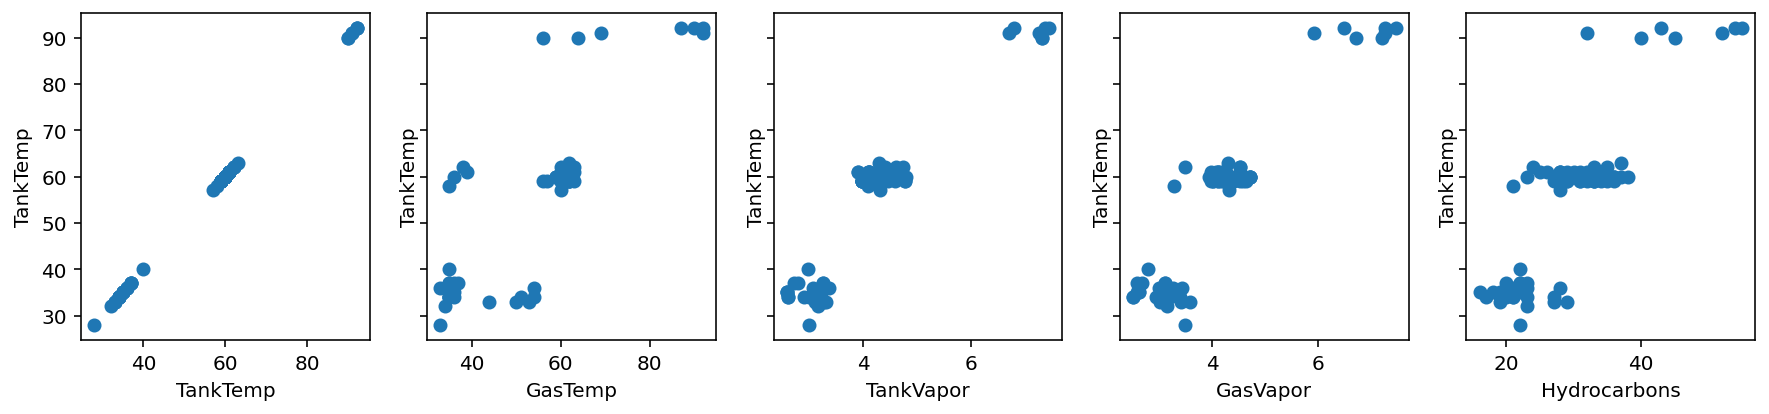

Relationships to GasTemp


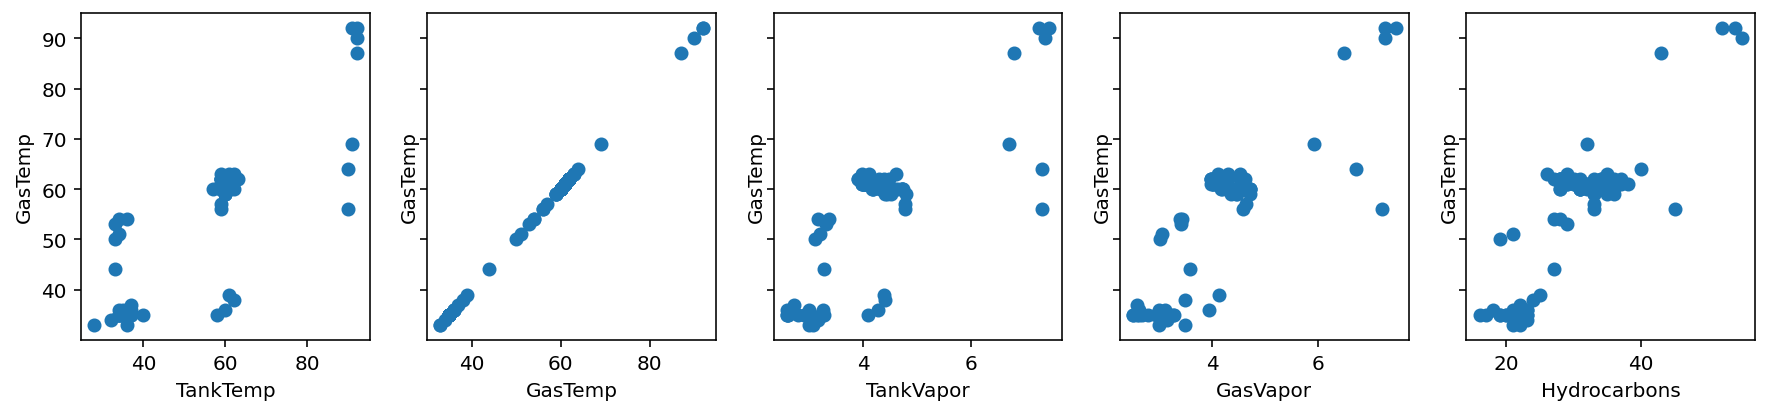

Relationships to TankVapor


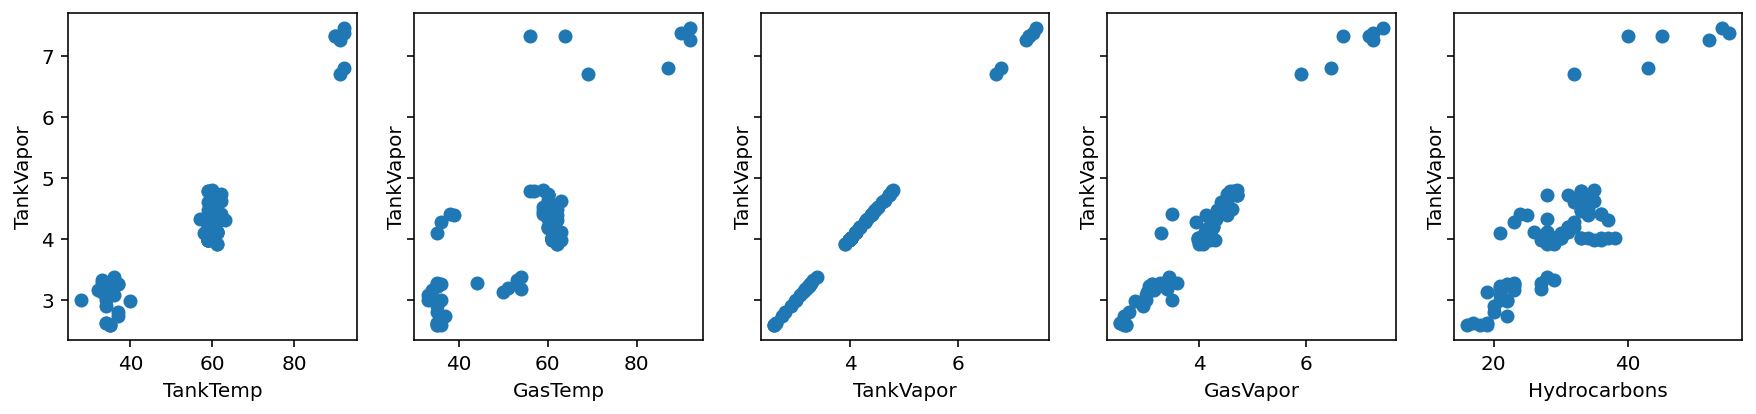

Relationships to GasVapor


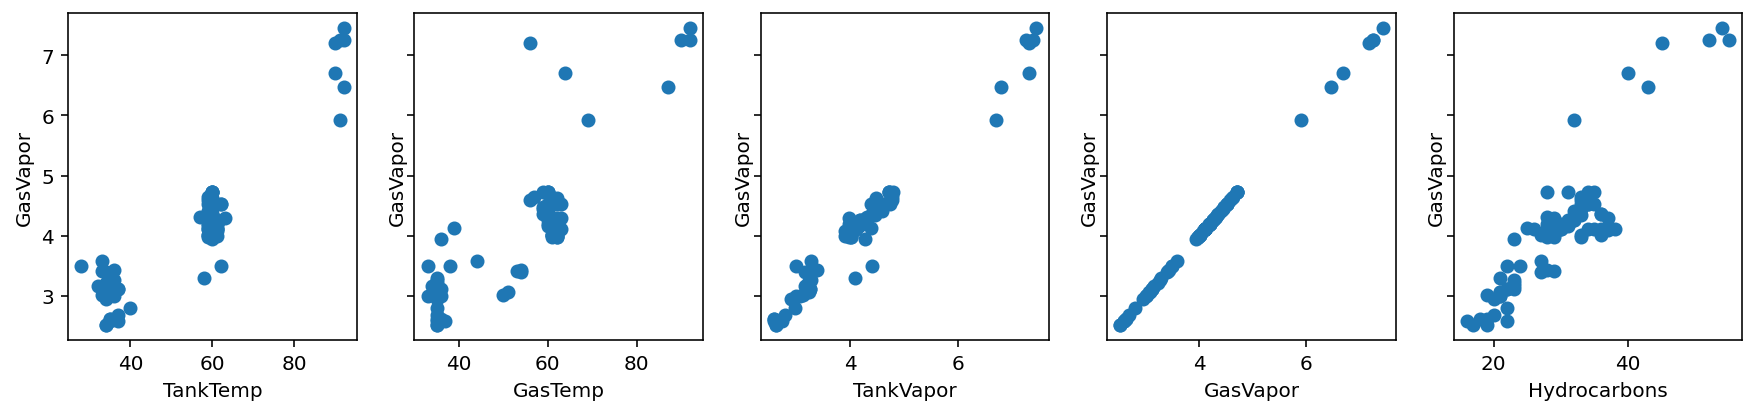

Relationships to Hydrocarbons


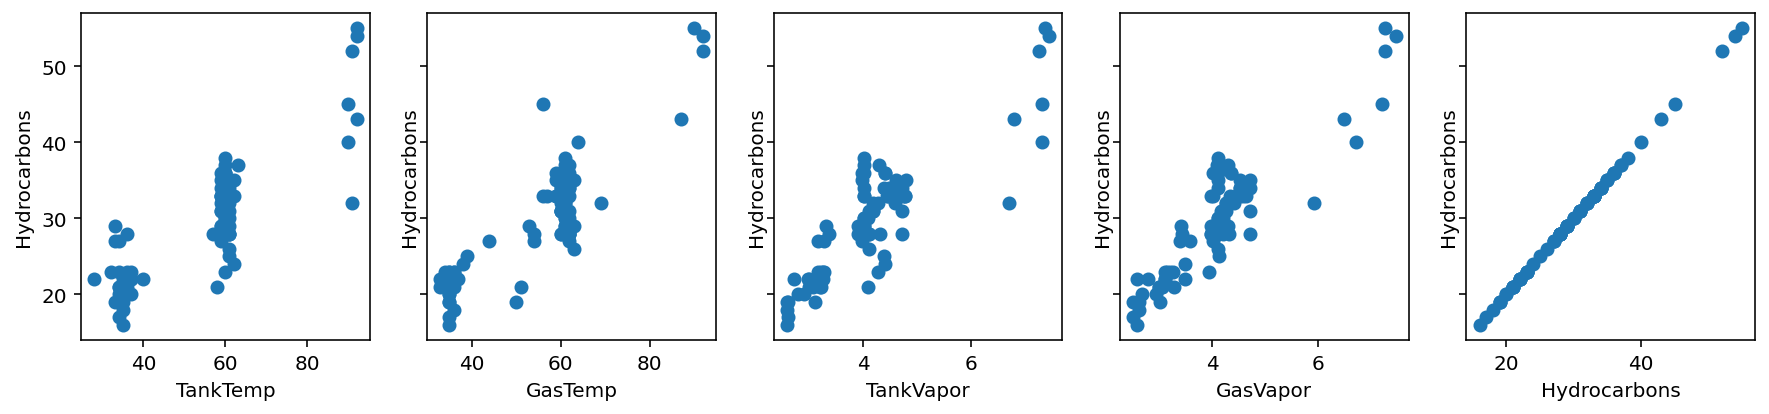

In [35]:
# Compare all variables  against each  other to find 
# relationships between potential predictor variables and Hydrocarbons
# as well as relationships between potential predictor variables

variables = gasvapor_train.columns
for y in variables:
    print('Relationships to %s' % y)
    fig, ax = plt.subplots(1, len(variables), figsize=(15, 3), sharey=True)
    for i, x in enumerate(variables):
        ax[i].scatter(gasvapor_train[x], gasvapor_train[y])
        ax[i].set_xlabel(x)
        ax[i].set_ylabel(y)
    plt.show()


- It looks like there are 3 distinct tank temperature ranges at  which data was taken. That is, around 30-40, around 60, and 90-100. This may impact the data.

- Since Hydrocarbons data looks correlated with TankTemp and TankTemp  is clustered,  it may be worthwhile to create a piecewise model, with 'Local Linear Smoothing', such as in Rice Section 14.7, or to transform TankTemp into a categorical variable.

- TankTemp does not appear to be as correlated with GasTemp as other variables (note this is not so surprising since tank temperature is about initial tank temperature and gas temperature is about dispensed gasoline).

- TankTemp looks most correlated  with TankVapor and GasVapor.

- TankVapor and GasVapor appear highly correlated.

- There are no obvious outliers, except possibly a few that deviate from the correlation between GasVapor and GasTemp.

- Hydrocarbons looks correlated with each of the other  variables. It looks more correlated with GasVapor.

- However, since  the other variables are correlated with eachother, they will add redundant information and can weaken the model.

In summary:

- GasVapor may be the most important predictor variable. Since it is highly correlated  with TankVapor, a model with GasVapor and without TankVapor might be wise.

#### b. Try fitting a few different models and select two that you think are the best.	

Y: Hydrocarbons

##### Model 1:

Y = constant + β0 x GasVapor + e


##### Model 2:

Y = constant + β0 x GasVapor + β1 x GasTemp  + e


##### Model 3:

Y = constant + β0 x GasVapor + β1 x TankTemp  + e

##### Model 4:

Y = constant + β0 x GasVapor + β1 x TankTemp + β2 x GasTemp + e

In [45]:
import statsmodels.api as sm

Y = gasvapor_train['Hydrocarbons']

#####  Model 1:

Y = constant + β0 x GasVapor + e

In [41]:
X = gasvapor_train['GasVapor']
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Hydrocarbons   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     398.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.99e-33
Time:                        14:41:25   Log-Likelihood:                -218.35
No. Observations:                  85   AIC:                             440.7
Df Residuals:                      83   BIC:                             445.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6659      1.397      1.909      0.0

##### Model 2:

Y = constant + β0 x GasVapor + β1 x GasTemp  + e

In [43]:
X = gasvapor_train[['GasVapor', 'GasTemp']]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Hydrocarbons   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           3.05e-37
Time:                        14:43:46   Log-Likelihood:                -205.91
No. Observations:                  85   AIC:                             417.8
Df Residuals:                      82   BIC:                             425.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5590      1.278      0.438      0.6


Model 3:

Y = constant + β0 x GasVapor + β1 x TankTemp  + e

In [44]:
X = gasvapor_train[['GasVapor', 'TankTemp']]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Hydrocarbons   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.87e-32
Time:                        14:44:48   Log-Likelihood:                -218.33
No. Observations:                  85   AIC:                             442.7
Df Residuals:                      82   BIC:                             450.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6816      1.406      1.907      0.0

##### Model 4:

Y = constant + β0 x GasVapor + β1 x TankTemp + β2 x GasTemp + e

In [46]:
X = gasvapor_train[['GasVapor', 'TankTemp', 'GasTemp']]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Hydrocarbons   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     188.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.98e-36
Time:                        14:46:14   Log-Likelihood:                -204.79
No. Observations:                  85   AIC:                             417.6
Df Residuals:                      81   BIC:                             427.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2748      1.283      0.214      0.8

Based on the Adjusted  R-Squared values, the Models 2 and 4 performed best.

##### Model 2:
Y = constant + β0 x GasVapor + β1 x GasTemp  + e
##### Model 4:
Y = constant + β0 x GasVapor + β1 x TankTemp + β2 x GasTemp + e

#### c. Using these two models, predict the responses for the 40 observations you have held out and compare the predictions to the observed values by plotting predicted versus observed values, and by plotting prediction errors versus each of the independent variables. Summarize the strength of the prediction by the root mean square prediction error:
$ RMSPE = \sqrt{(1/40) \sum (Y_i - Y_i')^2} $

In [60]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

Y_train = gasvapor_train['Hydrocarbons']
Y_test = gasvapor_test['Hydrocarbons']

#### For Model 2

parameters: 0.5589538636778997 [4.34974203 0.20645531]


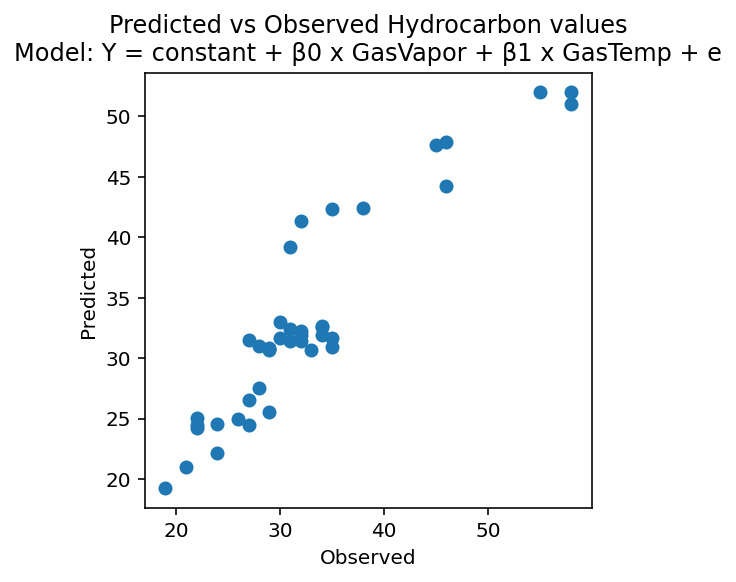

In [79]:
X_train = gasvapor_train[['GasVapor', 'GasTemp']]
X_test = gasvapor_test[['GasVapor', 'GasTemp']]
model = linear_model.LinearRegression().fit(
    X_train,
    Y_train,
)
print('parameters:', model.intercept_, model.coef_)
predictions = model.predict(X_test)

# Predicted vs Observed values
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(Y_test, predictions)
ax.set_title('Predicted vs Observed Hydrocarbon values\nModel: Y = constant + β0 x GasVapor + β1 x GasTemp + e')
ax.set_ylabel('Predicted')
_ = ax.set_xlabel('Observed')

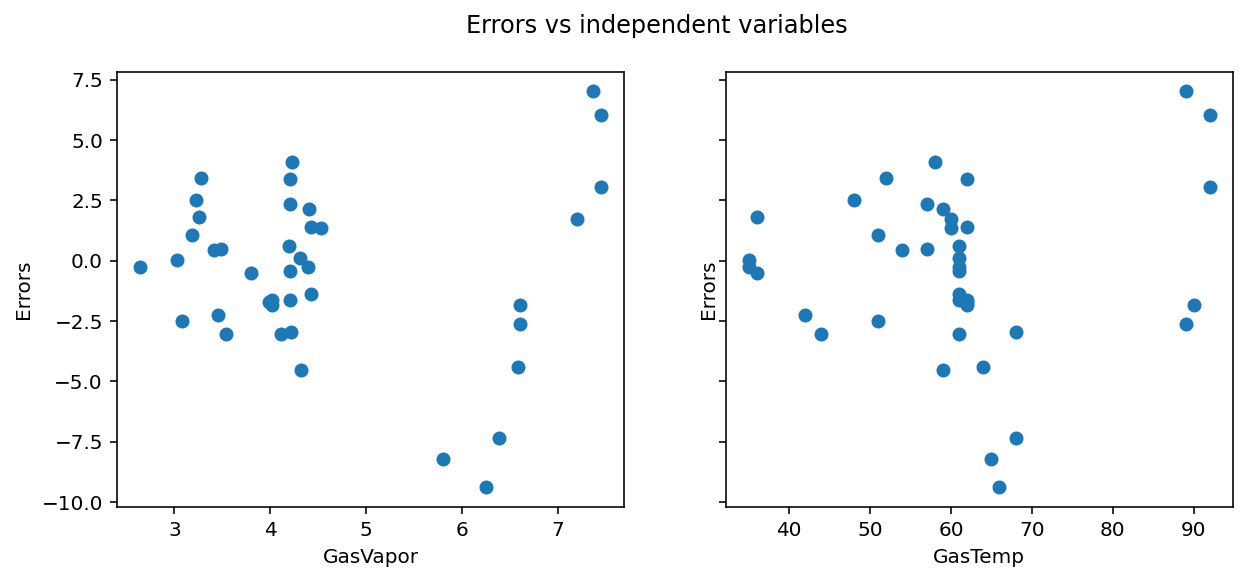

In [75]:
# Plotting errors against each independent variable
errors = Y_test - predictions
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4), sharey=True)
fig.suptitle('Errors vs independent variables')
var0, var1 = 'GasVapor', 'GasTemp'
ax0.scatter(gasvapor_test[var0], errors)
ax0.set_ylabel('Errors')
ax0.set_xlabel(var0)
ax1.scatter(gasvapor_test[var1], errors)
ax1.set_ylabel('Errors')
_ = ax1.set_xlabel(var1)

The errors appear more  spread out as the GasTemp and GasVapor values increase.

For RMSPE calculation:

In [77]:
rmspe = np.sqrt(mean_squared_error(Y_test, predictions))
print('RMSPE = %s' % rmspe)

RMSPE = 3.446586830789641



##### For Model  4

Y = constant + β0 x GasVapor + β1 x TankTemp + β2 x GasTemp + e

parameters: 0.27482438915755125 [ 5.18301278 -0.07541601  0.22524774]


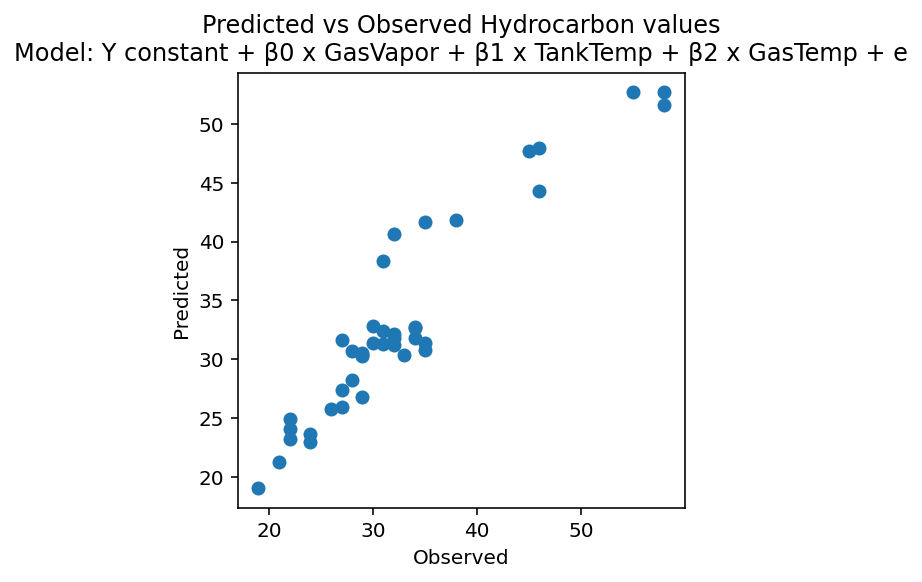

In [80]:
X_train = gasvapor_train[['GasVapor', 'TankTemp', 'GasTemp']]
X_test = gasvapor_test[['GasVapor', 'TankTemp', 'GasTemp']]
model = linear_model.LinearRegression().fit(
    X_train,
    Y_train,
)
print('parameters:', model.intercept_, model.coef_)
predictions = model.predict(X_test)

# Predicted vs Observed values
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(Y_test, predictions)
ax.set_title('Predicted vs Observed Hydrocarbon values\nModel: Y constant + β0 x GasVapor + β1 x TankTemp + β2 x GasTemp + e')
ax.set_ylabel('Predicted')
_ = ax.set_xlabel('Observed')

RMSPE = 3.1264183875661664


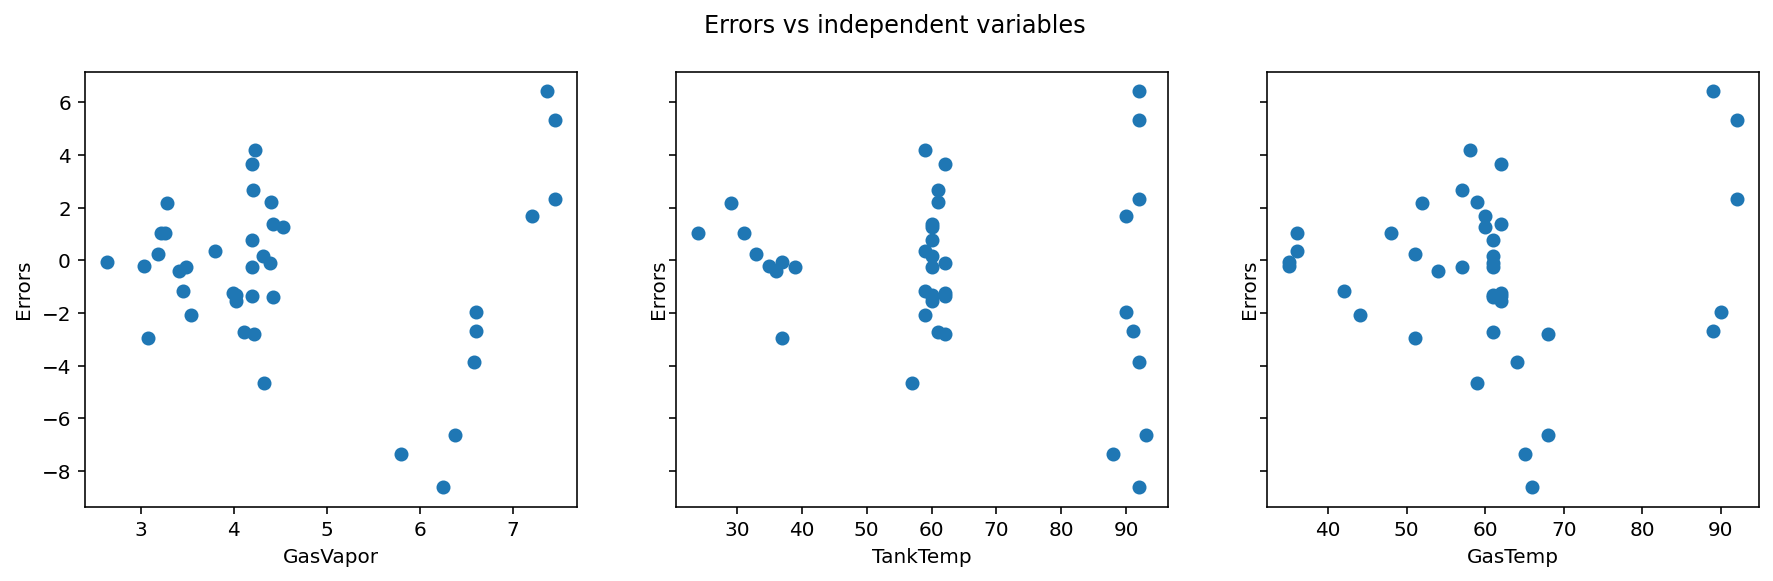

In [82]:
# Plotting errors against each independent variable
errors = Y_test - predictions
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,4), sharey=True)
fig.suptitle('Errors vs independent variables')
var0, var1, var2 = 'GasVapor', 'TankTemp', 'GasTemp'
ax0.scatter(gasvapor_test[var0], errors)
ax0.set_ylabel('Errors')
ax0.set_xlabel(var0)
ax1.scatter(gasvapor_test[var1], errors)
ax1.set_ylabel('Errors')
ax1.set_xlabel(var1)
ax2.scatter(gasvapor_test[var2], errors)
ax2.set_ylabel('Errors')
ax2.set_xlabel(var2)

rmspe = np.sqrt(mean_squared_error(Y_test, predictions))
print('RMSPE = %s' % rmspe)